<a href="https://colab.research.google.com/github/lucaspn017/sales_time_series/blob/main/Projeto_An%C3%A1lise_de_Segmenta%C3%A7%C3%A3o_de_Clientes_em_um_Varejo_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Coleta e Pré-Processamento de Dados

In [6]:
import pandas as pd

df = pd.read_csv('/content/OnlineRetail.csv', encoding='latin1')
df = df[df['CustomerID'].notna()]  # Remover clientes sem ID
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#2. Análise Exploratória (EDA)

<Axes: ylabel='Country'>

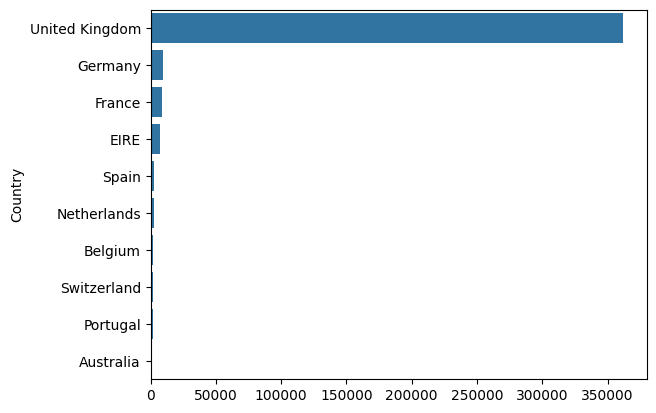

In [7]:
import seaborn as sns

# Top 10 países por vendas
sns.barplot(x=df['Country'].value_counts().head(10).values, y=df['Country'].value_counts().head(10).index)

# 3. Engenharia de Features para Segmentação

In [11]:
# Converter InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


# Calcular a data de referência
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calcular RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recência
    'InvoiceNo': 'nunique',  # Frequência
    'TotalPrice': 'sum'  # Valor Monetário
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())  # Visualizar o resultado


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


# 4. Clusterização com K-Means

<Axes: >

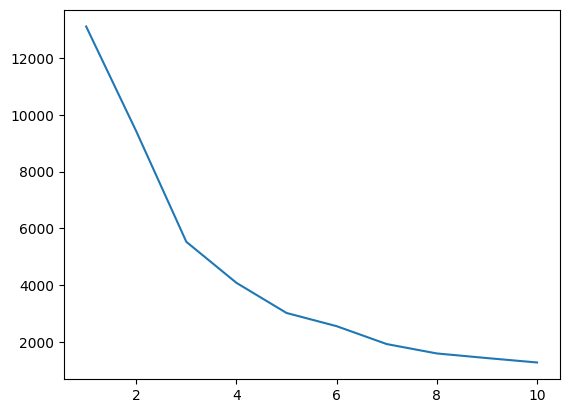

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Método do Cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=sse)  # Escolher k=4 ou k=5

#5. Análise dos Clusters

<Axes: >

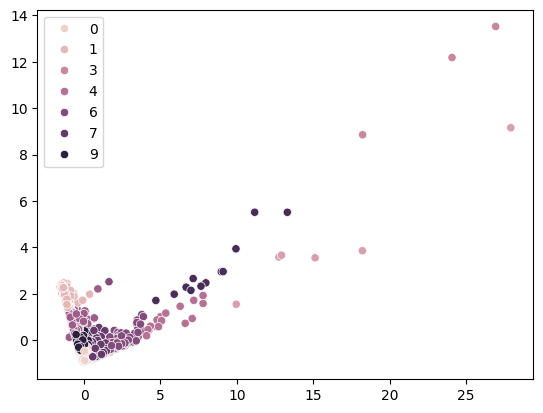

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
sns.scatterplot(x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=kmeans.labels_)